# Possible Questions
## Analysis Questions
1. How many movies vs TV shows are on Netflix?
2. Which country produces the most content?
3. How has content production changed over the years?
4. Are certain ratings more common for movies than TV shows?
5. Which genres dominate Netflix's catalog?
## Hypothesis
1. The majority of Netflix content is movies.
2. The United States produces the largest amount of Netflix content.
3. Netflix has released more content in recent years compared to earlier years.

In [0]:

# Upload Dataset


import pandas as pd
df = pd.read_csv("netflix_titles.csv")
df.head()
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# Data Cleaning

In [0]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Check missing values
df.isnull().sum()

# change first letter to capital
df['country'] = df['country'].str.strip()
df['title'] = df['title'].str.title() 

# Fill missing categorical columns with most common value (mode)
for col in ['director', 'cast', 'country', 'rating']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# change rating to numeric values
df['rating'] = df['rating'].astype('category').cat.codes

# change data type for date_added
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   int8          
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), int8(1), object(9)
memory usage: 834.3+ KB


# Data Visualization

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

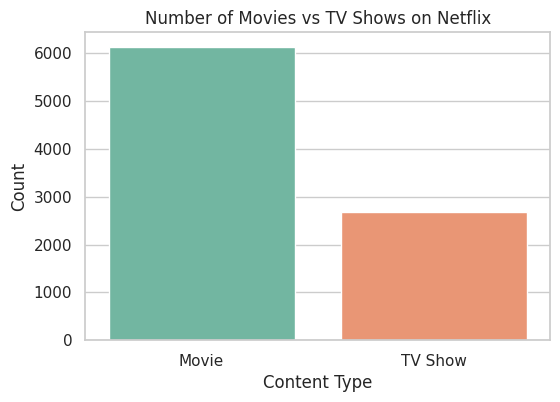

In [0]:
# 1. Movies vs TV Shows

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Number of Movies vs TV Shows on Netflix')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()

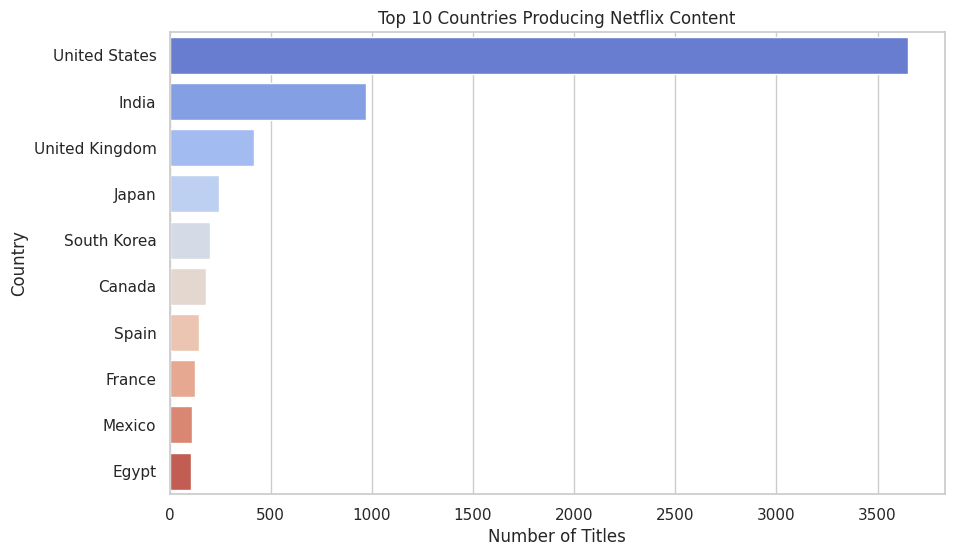

In [0]:

# 2. Top 10 countries producing netflix content

top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title('Top 10 Countries Producing Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

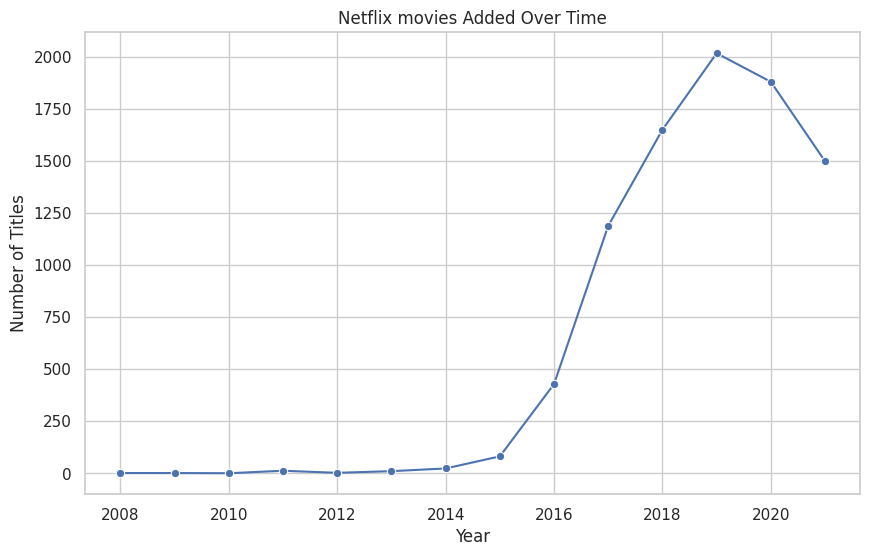

In [0]:
# 3. Content added over the years to the Netflix

df['year_added'] = pd.to_datetime(df['date_added']).dt.year
yearly_counts = df['year_added'].value_counts().sort_index()

plt.figure(figsize=(10,6))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o')
plt.title('Netflix movies Added Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()

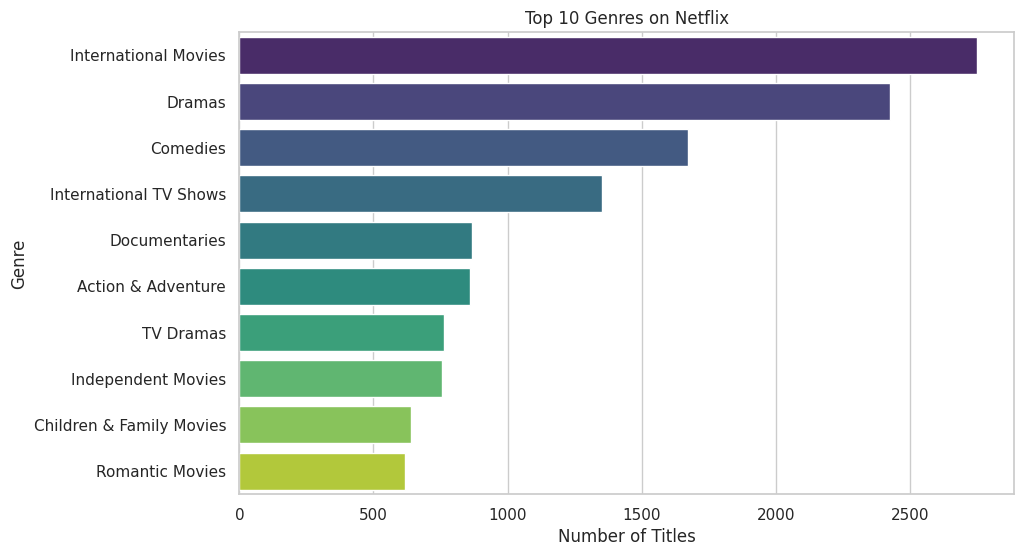

In [0]:
# 5. Top genres on Netflix

all_genres = df['listed_in'].str.split(',').explode().str.strip()
top_genres = all_genres.value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

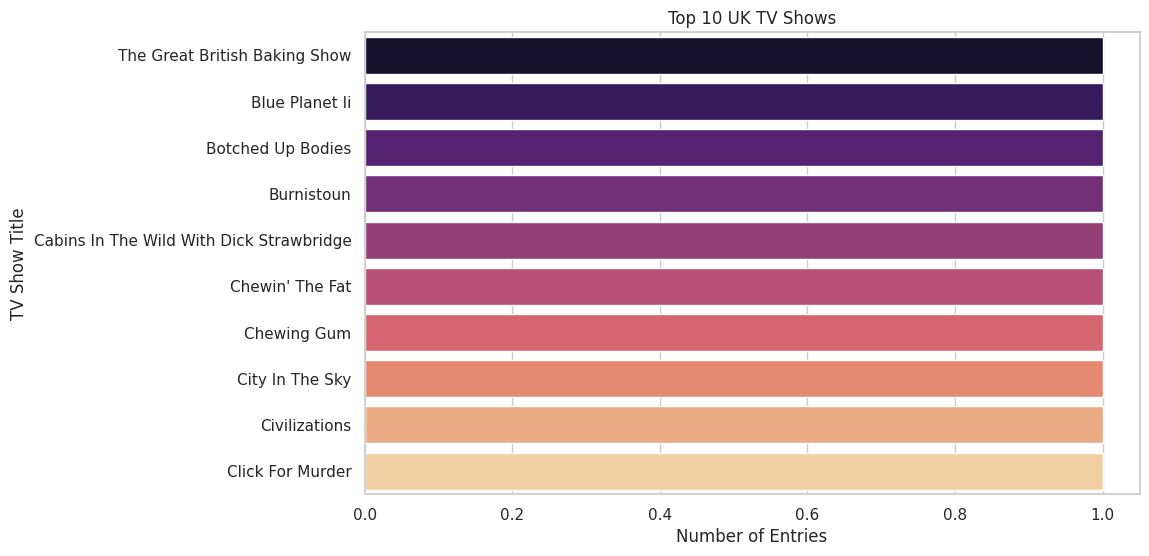

In [0]:

# Top 10 Uk shows 
df_uk_tv = df[(df['country'] == 'United Kingdom') & (df['type'] == 'TV Show')]
top_shows = df_uk_tv['title'].value_counts().head(10).reset_index()
top_shows.columns = ['title', 'count']

plt.figure(figsize=(10,6))
sns.barplot(data=top_shows, x='count', y='title', palette='magma')
plt.title('Top 10 UK TV Shows')
plt.xlabel('Number of Entries')
plt.ylabel('TV Show Title')
plt.show()

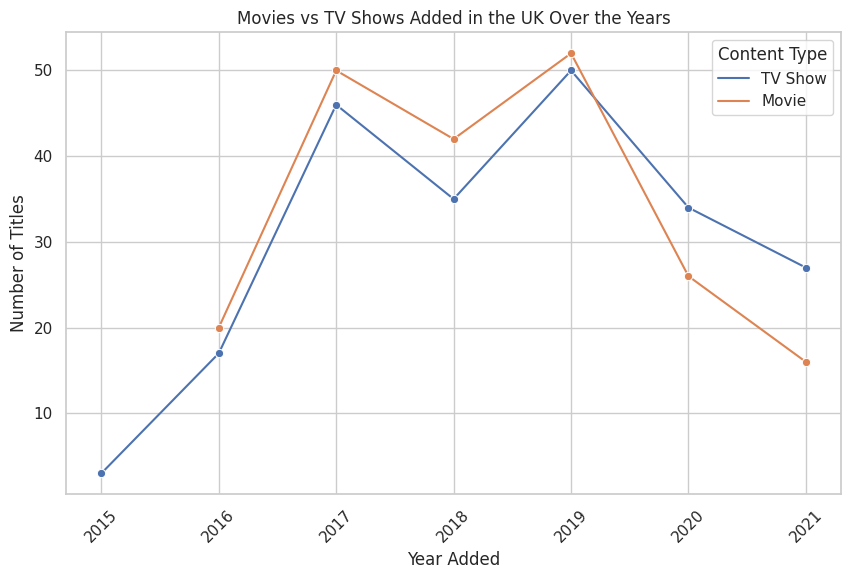

In [0]:
# Movies & TV shows added over years in uk 

df_uk = df[df['country'] == 'United Kingdom'].copy()
df_uk['year_added'] = pd.to_datetime(df_uk['date_added']).dt.year
uk_counts = df_uk.groupby(['year_added', 'type']).size().reset_index(name='count')
plt.figure(figsize=(10,6))
sns.lineplot(data=uk_counts, x='year_added', y='count', hue='type', marker='o')

plt.title('Movies vs TV Shows Added in the UK Over the Years')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.legend(title='Content Type')
plt.xticks(rotation=45)
plt.show()

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Encode rating as numeric
df['rating_code'] = df['rating'].astype('category').cat.codes.fillna(0)
df['type_encoded'] = df['type'].map({'Movie': 0, 'TV Show': 1})
df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)


# Select features & target
features = ['release_year', 'rating_code', 'duration_num']
df_ml = df[features + ['type_encoded']].dropna()
X = df_ml[features]
y = df_ml['type_encoded']

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9988642816581488
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1195
           1       1.00      1.00      1.00       566

    accuracy                           1.00      1761
   macro avg       1.00      1.00      1.00      1761
weighted avg       1.00      1.00      1.00      1761

